In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### 1.아버지와 아들의 키 -Galton

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발취하고 단위를 cm로 변환

In [4]:
df = df[df.Gender == 'M']
height = df[['Father','Height']].rename(columns={'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [5]:
height = height + 2.54
height.head()

,Father,Son
0,81.04,75.74
4,78.04,76.04
5,78.04,75.04
8,77.54,73.54
10,77.54,73.04


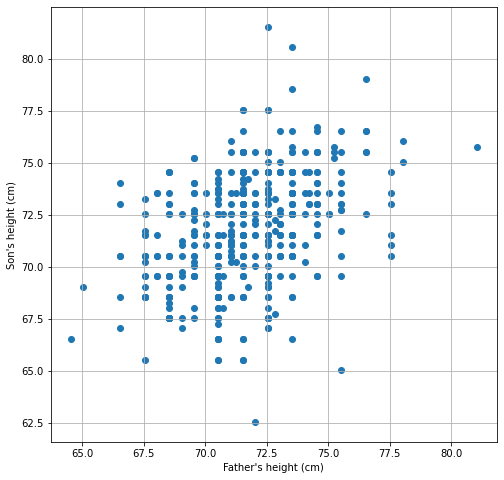

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Numpy 최소 자승법을 이용해서 회귀선 구하기

In [7]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [8]:
height.Father.shape

(465,)

In [9]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 39.6616325 ]),
 array([2721.27836746]),
 2,
 array([1.54724844e+03, 6.90462165e-01]))

In [10]:
# 기울기와 절편
m, c = reg[0]

In [11]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [12]:
m, c, rss

(0.44774791760302485, 39.66163249692353, 2721.2783674582984)

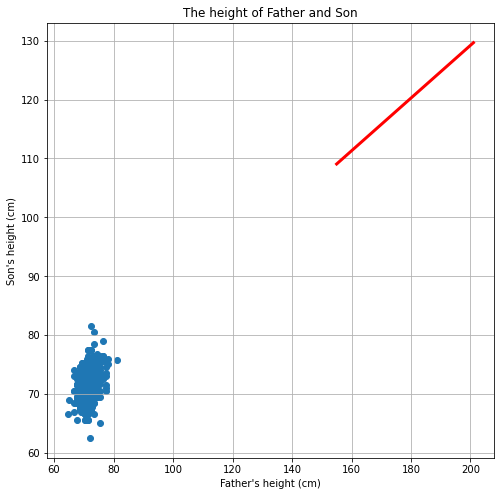

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155,201],[m*155+c, m*201+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Scikit-Learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
height.Father.values.shape

(465,)

In [23]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [24]:
X.shape, y.shape

((465, 1), (465,))

In [25]:
lr = LinearRegression()
lr.fit(X, y)        # X 는 2D Array 이어야 함

LinearRegression()

In [26]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(0.4477479176030257, 39.66163249692351, 2721.2783674583034)

In [27]:
# R squared
lr.score(X, y)

0.15312927478307048